# Proyecto de Análisis de Sentimientos con Machine Learning

## Introducción
En este proyecto, se aborda el análisis de sentimientos en tweets utilizando técnicas de procesamiento de lenguaje natural y machine learning. El objetivo es clasificar los tweets en categorías de emociones: Positiva, Negativa o Neutral.

Este proyecto se centra en el análisis de sentimientos en textos a través de técnicas de procesamiento de lenguaje natural y modelado de machine learning. Se exploró un conjunto de datos de tweets etiquetados con emociones y se aplicaron diversas técnicas para preparar los datos, incluyendo la tokenización y la extracción de características a través de Count Vectorization. Se implementaron varios modelos de clasificación, entre ellos Regresión Logística, Árbol de Decisión y Naive Bayes, para predecir las emociones asociadas a los tweets. La evaluación detallada de cada modelo reveló resultados diversos, destacando la necesidad de abordar el desequilibrio de clases para mejorar el rendimiento del Árbol de Decisión. La presentación de resultados incluye métricas clave como precisión, recall y F1-score, ofreciendo una visión completa del rendimiento de cada modelo. Además, se proporciona una visualización de la distribución de emociones, contribuyendo así a una comprensión más profunda de la calidad de las predicciones. Este trabajo no solo aborda la implementación de modelos, sino también la interpretación crítica de los resultados y la identificación de áreas para posibles mejoras.

## Configuración del Entorno
En esta sección, se realiza la configuración del entorno, incluyendo la importación de bibliotecas y la montura del drive para acceder a los datos.

In [ ]:
# Importaciones
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Configuración de advertencias
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn')
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Función para agregar etiquetas con porcentaje en los gráficos de barras
def add_percentage_labels(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(f'{p.get_height()}\n{percentage}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Descargar stopwords de NLTK
nltk.download('stopwords')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Figure size 800x600 with 0 Axes>

## Carga y Preprocesamiento de Datos
Se realiza la carga del conjunto de datos y se realiza un preprocesamiento para asignar una etiqueta de emoción a cada tweet.

In [ ]:
# Ruta del archivo CSV
archivo_csv = '/content/drive/MyDrive/Portafolio/ML Clasificación - Análisis de Sentimientos/training_tweets.csv'

# Cargar datos desde el archivo CSV
df = pd.read_csv(archivo_csv).drop(columns='Unnamed: 0')

# Mostrar las primeras filas del DataFrame
df.head()

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry


In [ ]:
# Asignación de etiquetas de emoción
# Crear una nueva columna 'emocion' e inicializarla con una cadena vacía
df['emocion'] = ''

# Definir diccionario para mapear emociones positivas y negativas
emociones_positivas = ['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm']
emociones_negativas = ['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger']

# Asignar etiquetas de emociones positivas
for emocion_positiva in emociones_positivas:
    df['emocion'] = np.where((df['sentiment'] == emocion_positiva) & (df['emocion'] == ''), 'Positiva', df['emocion'])

# Asignar etiquetas de emociones negativas
for emocion_negativa in emociones_negativas:
    df['emocion'] = np.where((df['sentiment'] == emocion_negativa) & (df['emocion'] == ''), 'Negativa', df['emocion'])

# Asignar etiquetas de emociones neutras a las entradas restantes
df['emocion'] = np.where(df['emocion'] == '', 'Neutral', df['emocion'])

In [ ]:
# Mostrar las primeras filas del DataFrame
df.head()

,content,sentiment,emocion
0,Happy Mama's day to all mothers,love,Positiva
1,@LysdelTellez I am lost. Please help me find a...,worry,Negativa
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,Positiva
3,you@snapplynn Wish that would have been your t...,neutral,Neutral
4,now i am doing the MicroEconomics project iha...,worry,Negativa


In [ ]:
# Mostrar la cantidad de valores nulos por columna
df.isna().sum()

content      0
sentiment    0
emocion      0
dtype: int64

In [ ]:
# Proporcionar información detallada sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
 2   emocion    30000 non-null  object
dtypes: object(3)
memory usage: 703.2+ KB


## Análisis Exploratorio de Datos
En esta sección, se realizan visualizaciones para entender la distribución de las emociones en los datos.

In [ ]:
# Contar la cantidad de ocurrencias de cada emoción positiva
conteo_emociones_positivas = df['sentiment'][df['emocion'] == 'Positiva'].value_counts()
print(conteo_emociones_positivas)

happiness     3952
love          2908
surprise      1619
fun           1331
relief        1158
enthusiasm     559
Name: sentiment, dtype: int64


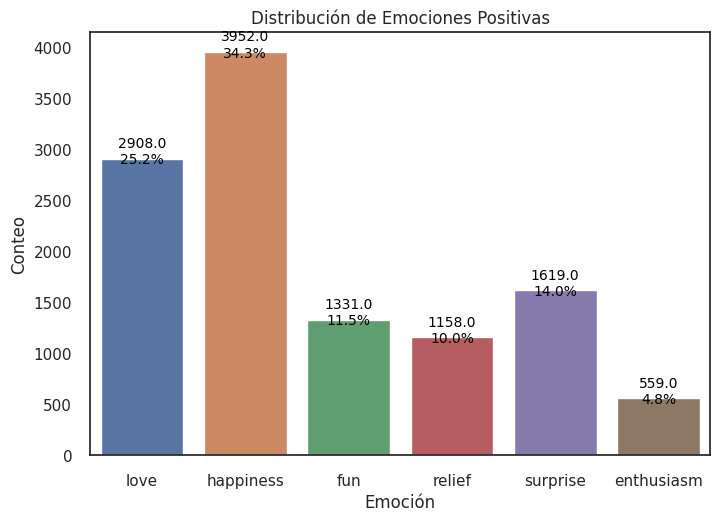

In [ ]:
# Gráfico de barras para la distribución de emociones positivas
ax1 = sns.countplot(x='sentiment', data=df[df['emocion'] == 'Positiva'])
plt.title('Distribución de Emociones Positivas')
plt.xlabel('Emoción')
plt.ylabel('Conteo')
add_percentage_labels(ax1, len(df[df['emocion'] == 'Positiva']))
plt.show()

In [ ]:
# Contar la cantidad de ocurrencias de cada emoción negativa
conteo_emociones_negativas = df['sentiment'][df['emocion'] == 'Negativa'].value_counts()
print(conteo_emociones_negativas)

worry      6337
sadness    3869
hate        975
empty       617
boredom     135
anger        89
Name: sentiment, dtype: int64


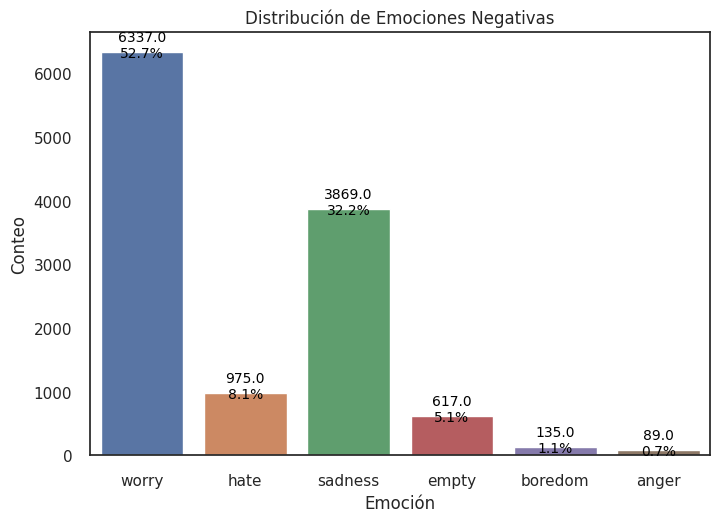

In [ ]:
# Gráfico de barras para la distribución de emociones negativas
ax2 = sns.countplot(x='sentiment', data=df[df['emocion'] == 'Negativa'])
plt.title('Distribución de Emociones Negativas')
plt.xlabel('Emoción')
plt.ylabel('Conteo')
add_percentage_labels(ax2, len(df[df['emocion'] == 'Negativa']))
plt.show()

In [ ]:
# Contar la cantidad de ocurrencias de cada emoción neutral
conteo_emociones_neutrales = df['sentiment'][df['emocion'] == 'Neutral'].value_counts()
print(conteo_emociones_neutrales)

neutral    6451
Name: sentiment, dtype: int64


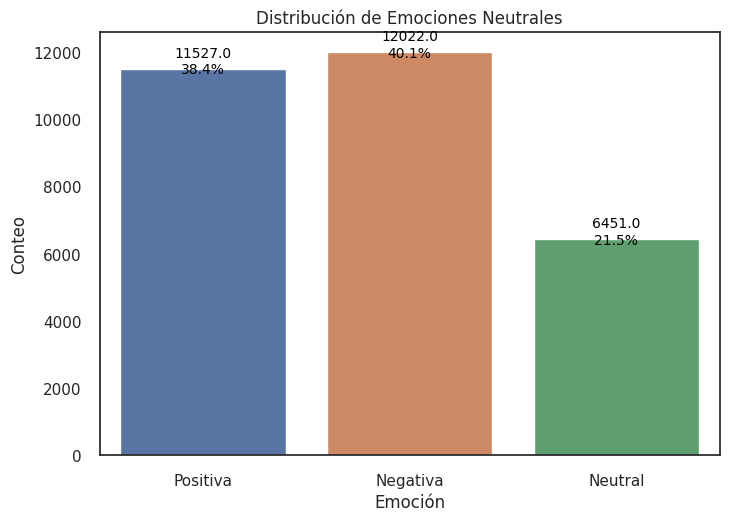

In [ ]:
# Gráfico de barras para la distribución de emociones neutrales
ax3 = sns.countplot(x='emocion', data=df)
plt.title('Distribución de Emociones Neutrales')
plt.xlabel('Emoción')
plt.ylabel('Conteo')
add_percentage_labels(ax3, len(df))
plt.show()

## Procesamiento de Texto y Extracción de Características
Se utiliza la técnica de Count Vectorization para convertir los textos de los tweets en características numéricas.

In [ ]:
# Convertir el contenido del DataFrame a minúsculas
columna_lower = [texto.lower() for texto in list(df['content'])]
df['content_lower'] = columna_lower

# Eliminar la columna original 'content'
df = df.drop(columns='content')

In [ ]:
# Inicializar el CountVectorizer con configuraciones específicas
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Aplicar el CountVectorizer al texto en minúsculas
count_vectorizer_fit = count_vectorizer.fit_transform(df['content_lower'])

# Obtener las palabras características y sus frecuencias
palabras = count_vectorizer.get_feature_names_out()
frecuencias_palabras = count_vectorizer_fit.toarray().sum(axis=0)

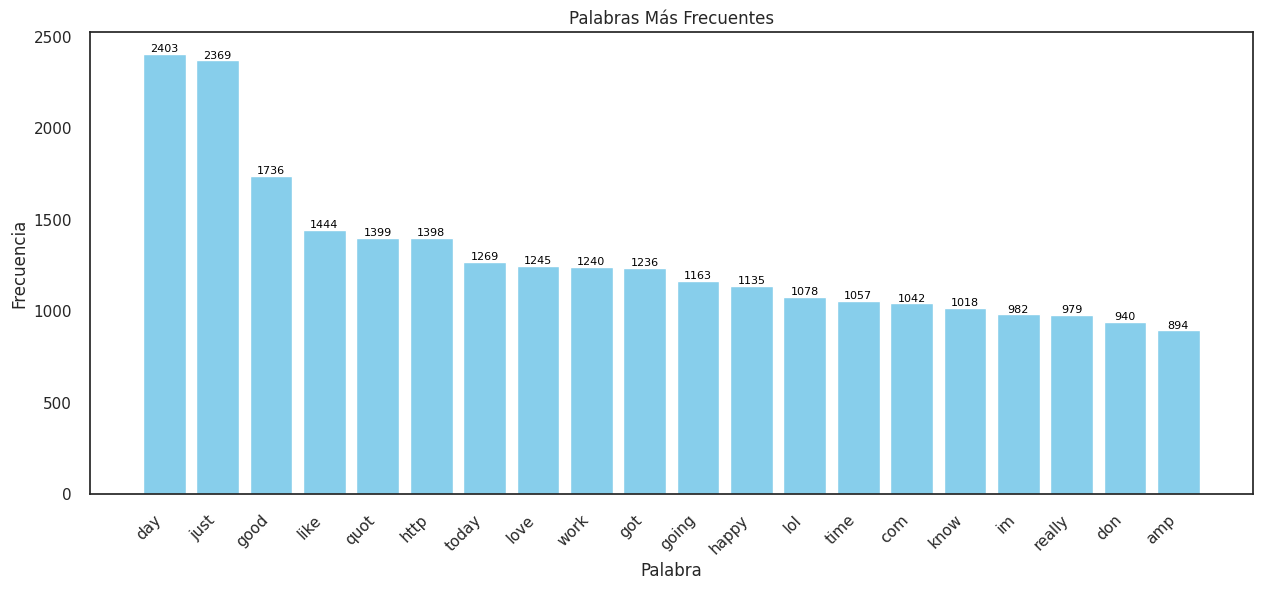

In [ ]:
# Crear un DataFrame con las palabras más frecuentes y sus frecuencias
palabras_frecuentes_df = pd.DataFrame(list(zip(palabras, frecuencias_palabras)))

# Ordenar el DataFrame por frecuencia en orden descendente y mostrar las primeras 20 filas
palabras_frecuentes_df_sorted = palabras_frecuentes_df.sort_values(1, ascending=False).head(20)

# Gráfico de barras para mostrar las 20 palabras más frecuentes
plt.figure(figsize=(15, 6))
bars = plt.bar(palabras_frecuentes_df_sorted[0], palabras_frecuentes_df_sorted[1], color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras Más Frecuentes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad

# Agregar etiquetas de número y porcentaje
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1,round(yval, 1), ha='center', va='bottom', color='black', fontsize=8)

plt.show()

In [ ]:
# Crear un DataFrame final con características y etiquetas
df_final = pd.DataFrame.sparse.from_spmatrix(count_vectorizer_fit, columns=palabras)

# Agregar la columna 'emocion' al DataFrame final
df_final['emocion'] = df['emocion']

# Mostrar las primeras filas del DataFrame final
df_final.head()

,00,000,04,05,06,07,08,09,10,100,...,½m,½n,½ng,½o,½re,½s,½t,½y,½ï,emocion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positiva
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativa
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positiva
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativa


## Análisis de Datos Transformados
- Se realiza un análisis de los datos transformados, incluyendo la proporción de emociones en el conjunto de datos.

In [ ]:
# Mostrar la distribución de las etiquetas en el DataFrame final
distribucion_etiquetas = df_final['emocion'].value_counts()
print(distribucion_etiquetas)

Negativa    12022
Positiva    11527
Neutral      6451
Name: emocion, dtype: int64


In [ ]:
# Mostrar la distribución de las etiquetas excluyendo las neutrales
df_final_bin = df_final[df_final['emocion'] != 'Neutral']
# Crear una nueva columna binaria 'emocion' donde 1 indica 'Negativa' y 0 indica otras emociones
df_final_bin['emocion'] = np.where(df_final_bin['emocion'] == 'Negativa', 1, 0)

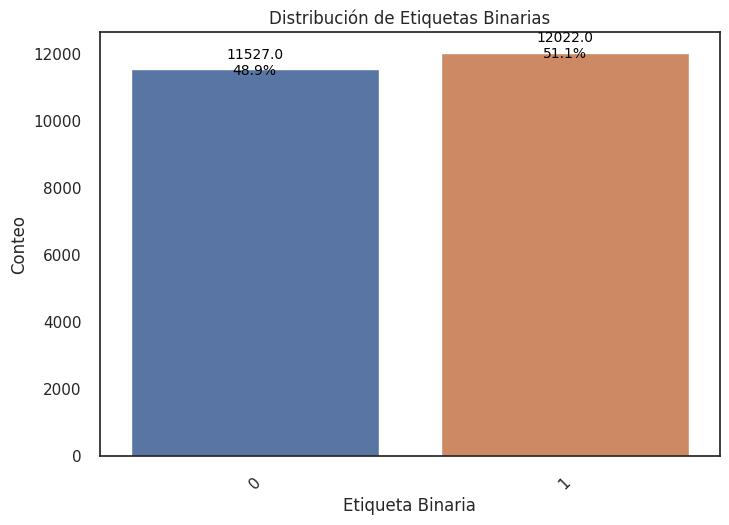

In [ ]:
# Gráfico de barras para las etiquetas binarias con porcentaje y etiquetas en las barras
ax4 = sns.countplot(x='emocion', data=df_final_bin)
plt.title('Distribución de Etiquetas Binarias')
plt.xlabel('Etiqueta Binaria')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
add_percentage_labels(ax4, len(df_final_bin))
plt.show()

In [ ]:
# Obtener información sobre valores nulos en el DataFrame binario final
nulos = list(df_final_bin.isna().sum())
porcentaje = list(round(df_final_bin.isna().sum() / len(df_final_bin), 4) * 100)
columnas = df_final_bin.columns
conteo_nulos = pd.DataFrame(zip(columnas, nulos, porcentaje)).rename(columns={0: 'Variable', 1: 'Nulos', 2: 'Porcentaje'})

# Filtrar y ordenar las variables con valores nulos
conteo_nulos = conteo_nulos[conteo_nulos['Nulos'] != 0].sort_values(by='Nulos', ascending=False)
conteo_nulos

,Variable,Nulos,Porcentaje


In [ ]:
# Mostrar información detallada sobre el DataFrame binario final
df_final_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23549 entries, 0 to 29998
Columns: 5001 entries, 00 to emocion
dtypes: Sparse[int64, 0](5000), int64(1)
memory usage: 1.9 MB


In [ ]:
# Mostrar la forma (número de filas y columnas) del DataFrame binario final
df_final_bin.shape

(23549, 5001)

## Construcción y Evaluación de Modelos de Machine Learning
En esta sección, se dividen los datos en conjuntos de entrenamiento y prueba, se construyen varios modelos y se evalúan sus rendimientos.

In [ ]:
# Dividir el DataFrame binario final en características (X) y etiquetas (y)
X = df_final_bin.drop(columns='emocion')
y = df_final_bin['emocion']

In [ ]:
# Dividir los conjuntos de datos en entrenamiento, prueba y validación
X_model, X_valid, y_model, y_valid = train_test_split(X, y, test_size=0.1, random_state=1313)
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.33, random_state=1313)

In [ ]:
# Inicializar un modelo de Regresión Logística
modelo_LR = LogisticRegression()

# Entrenar el modelo de Regresión Logística con los datos de entrenamiento
modelo_LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para el Árbol de Decisión
param_grid_tree = {'min_samples_split': [0.1, 0.5, 0.9],
                   'max_depth': [1, 5, 20],
                   'min_samples_leaf': [0.1, 0.5]}

# Inicializar un modelo de Árbol de Decisión con búsqueda de cuadrícula
modelo_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=3, n_jobs=-1)

# Entrenar el modelo de Árbol de Decisión con búsqueda de cuadrícula utilizando los datos de entrenamiento
modelo_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 20],
                         'min_samples_leaf': [0.1, 0.5],
                         'min_samples_split': [0.1, 0.5, 0.9]})

In [ ]:
# Obtener los mejores parámetros del modelo de Árbol de Decisión según la búsqueda de cuadrícula
mejores_parametros_tree = modelo_tree.best_params_

In [ ]:
# Inicializar un modelo de Árbol de Decisión con los mejores parámetros obtenidos
modelo_tree_best = DecisionTreeClassifier(**mejores_parametros_tree)

# Entrenar el modelo de Árbol de Decisión con los mejores parámetros utilizando los datos de entrenamiento
modelo_tree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Inicializar y entrenar un modelo de Naive Bayes tipo Bernoulli
modelo_NB = BernoulliNB()
modelo_NB.fit(X_train, y_train)

# Inicializar y entrenar un modelo de Naive Bayes tipo Multinomial
modelo_MNB = MultinomialNB()
modelo_MNB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Evaluar el modelo de Regresión Logística
resultados_LR = classification_report(y_test, modelo_LR.predict(X_test))

# Imprimir los resultados de la Regresión Logística
print("Resultados de Regresión Logística:")
print(resultados_LR)

Resultados de Regresión Logística:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      3456
           1       0.71      0.74      0.73      3539

    accuracy                           0.72      6995
   macro avg       0.72      0.72      0.72      6995
weighted avg       0.72      0.72      0.72      6995



In [ ]:
# Evaluar el modelo de Árbol de Decisión con los mejores parámetros
resultados_tree_best = classification_report(y_test, modelo_tree_best.predict(X_test))

# Imprimir los mejores parámetros encontrados para el Árbol de Decisión
print("\nMejores parámetros para el Árbol de Decisión:")
print(mejores_parametros_tree)

# Imprimir los resultados del Árbol de Decisión con los mejores parámetros
print("\nResultados del Árbol de Decisión:")
print(resultados_tree_best)


Mejores parámetros para el Árbol de Decisión:
{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

Resultados del Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3456
           1       0.51      1.00      0.67      3539

    accuracy                           0.51      6995
   macro avg       0.25      0.50      0.34      6995
weighted avg       0.26      0.51      0.34      6995



In [ ]:
# Evaluar el modelo de Naive Bayes tipo Bernoulli
resultados_NB = classification_report(y_test, modelo_NB.predict(X_test))

# Imprimir los resultados de Naive Bayes tipo Bernoulli
print("\nResultados de Naive Bayes (Bernoulli):")
print(resultados_NB)


Resultados de Naive Bayes (Bernoulli):
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3456
           1       0.70      0.76      0.73      3539

    accuracy                           0.72      6995
   macro avg       0.72      0.71      0.71      6995
weighted avg       0.72      0.72      0.71      6995



In [ ]:
# Evaluar el modelo de Naive Bayes tipo Multinomial
resultados_MNB = classification_report(y_test, modelo_MNB.predict(X_test))

# Imprimir los resultados de Naive Bayes tipo Multinomial
print("\nResultados de Naive Bayes (Multinomial):")
print(resultados_MNB)


Resultados de Naive Bayes (Multinomial):
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      3456
           1       0.71      0.75      0.73      3539

    accuracy                           0.72      6995
   macro avg       0.72      0.72      0.72      6995
weighted avg       0.72      0.72      0.72      6995



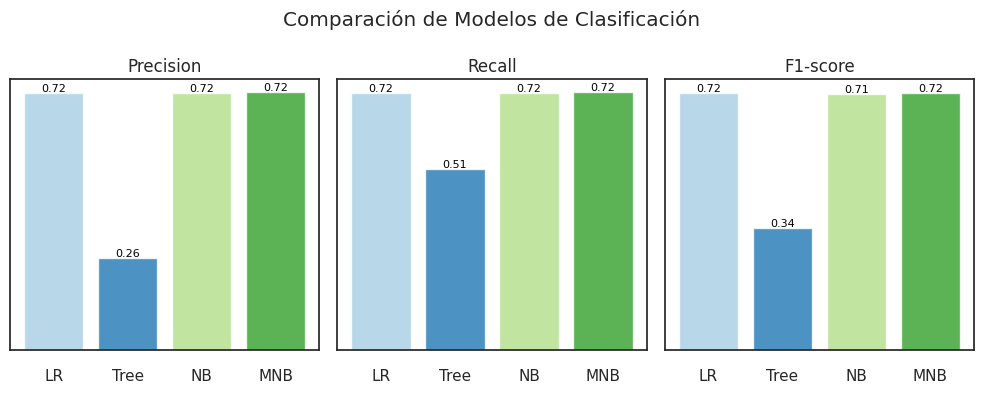

In [ ]:
# Resultados de los modelos como diccionarios
resultados_LR = classification_report(y_test, modelo_LR.predict(X_test), output_dict=True)
resultados_tree_best = classification_report(y_test, modelo_tree_best.predict(X_test), output_dict=True)
resultados_NB = classification_report(y_test, modelo_NB.predict(X_test), output_dict=True)
resultados_MNB = classification_report(y_test, modelo_MNB.predict(X_test), output_dict=True)

# Métricas y modelos a comparar
metricas = ['precision', 'recall', 'f1-score']
modelos = ['LR', 'Tree', 'NB', 'MNB']

colores = plt.cm.Paired(np.arange(len(modelos)))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharey=True)

for i, metrica in enumerate(metricas):
    valores_metrica = [resultados_LR['weighted avg'][metrica],
                       resultados_tree_best['weighted avg'][metrica],
                       resultados_NB['weighted avg'][metrica],
                       resultados_MNB['weighted avg'][metrica]]

    bars = axs[i].bar(modelos, valores_metrica, color=colores, alpha=0.8)
    axs[i].set_title(metrica.capitalize())

    for bar, modelo in zip(bars, modelos):
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),f'{bar.get_height():.2f}',ha='center', va='bottom', fontsize=8, color='black')

for ax in axs:
    ax.yaxis.set_visible(False)

fig.suptitle('Comparación de Modelos de Clasificación')
plt.tight_layout()
plt.show()


La Regresión Logística y los modelos de Naive Bayes (Bernoulli y Multinomial) muestran un rendimiento comparable y consistente en ambas clases.
El Árbol de Decisión parece estar sesgado hacia la clase mayoritaria, lo que afecta negativamente su rendimiento en la clase minoritaria.
Es importante tener en cuenta que la elección del modelo depende de varios factores, como los objetivos del proyecto y la naturaleza de los datos. Además, considerar la posibilidad de ajustar aún más los hiperparámetros y explorar técnicas de manejo de desequilibrios de clases podría mejorar los resultados, especialmente para el Árbol de Decisión.

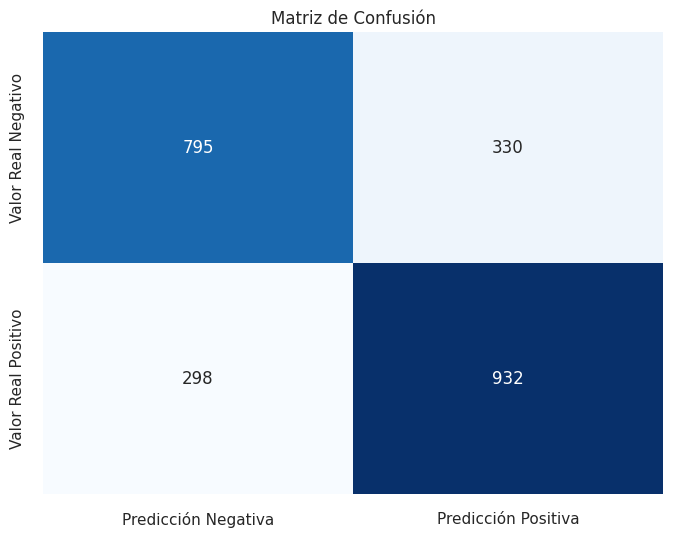

In [ ]:
# Se ocupa el modelo de Naive Bayes tipo Multinomial para crear la matriz de confusión con datos de validación

y_pred = modelo_MNB.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)

# Crear una representación visual mejorada de la matriz de confusión con etiquetas en los ejes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Agregar etiquetas a los ejes
plt.xticks(ticks=[0.5, 1.5], labels=['Predicción Negativa', 'Predicción Positiva'])
plt.yticks(ticks=[0.5, 1.5], labels=['Valor Real Negativo', 'Valor Real Positivo'])
plt.title("Matriz de Confusión")
plt.show()

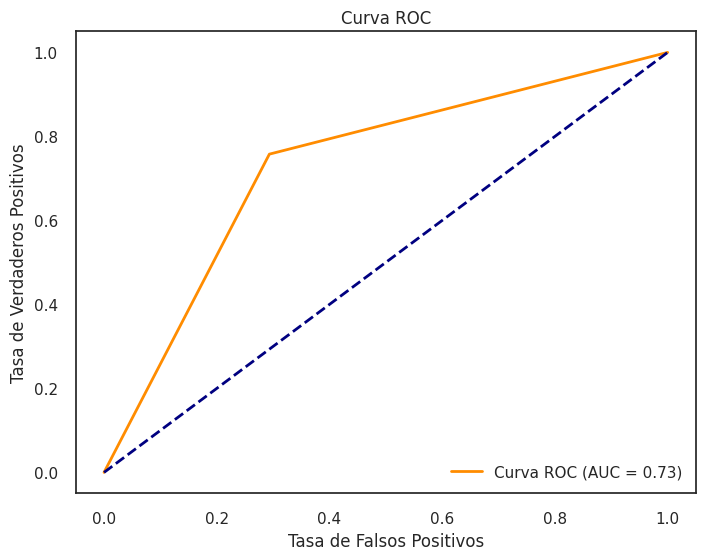

In [ ]:
# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_valid, y_pred)
roc_auc = auc(fpr, tpr)

# Crear una representación visual de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Conclusión

El análisis de sentimientos realizado mediante un modelo Naive Bayes (Multinomial) ha arrojado resultados prometedores. Con un conjunto de datos desbalanceado inicialmente, donde las emociones negativas superan a las positivas y neutrales, el modelo logró una precisión, recall y f1-score equilibrados para ambas clases, con una precisión general del 72%. La matriz de confusión en el conjunto de validación muestra que el modelo fue capaz de clasificar correctamente un alto número de instancias tanto positivas como negativas, pero también revela algunas falsas predicciones. El puntaje AUC de 0.73 indica un buen rendimiento en la capacidad del modelo para distinguir entre clases. No obstante, sería valioso explorar estrategias adicionales para manejar el desbalance de clases y realizar una afinación más detallada de hiperparámetros para potencialmente mejorar aún más el rendimiento del modelo. En general, el proyecto proporciona una base sólida para el análisis de sentimientos, destacando áreas de éxito y oportunidades de mejora.